In [1]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#   -O /tmp/horse-or-human.zip

In [2]:
import os
import zipfile

In [3]:
"""local_zip = '/tmp/horse-or-human.zip' #Zip File Location Path
zip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip
zip_ref.extractall('/tmp/horse-or-human') # All images will be located in /tmp/horse-or-man
zip_ref.close() # Close the File"""

"local_zip = '/tmp/horse-or-human.zip' #Zip File Location Path\nzip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip\nzip_ref.extractall('/tmp/horse-or-human') # All images will be located in /tmp/horse-or-man\nzip_ref.close() # Close the File"

In [4]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses') # Horse Directory
train_human_dir = os.path.join('/tmp/horse-or-human/humans') # Human Directory

In [5]:
train_horse_names = os.listdir(train_horse_dir) # List the Horse Images
print(train_horse_names[:10]) # Print 10 of them

train_human_names = os.listdir(train_human_dir) # List the Horse Images
print(train_human_names[:10])

['horse34-8.png', 'horse19-4.png', 'horse06-7.png', 'horse13-8.png', 'horse07-4.png', 'horse10-9.png', 'horse28-3.png', 'horse04-3.png', 'horse35-4.png', 'horse29-0.png']
['human17-10.png', 'human16-25.png', 'human10-10.png', 'human06-28.png', 'human05-04.png', 'human11-13.png', 'human06-10.png', 'human13-17.png', 'human14-07.png', 'human07-25.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir))) # Size of Horse Directory
print('total training human images:', len(os.listdir(train_human_dir))) # Size of Human Directory

total training horse images: 500
total training human images: 527


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 100
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

next_horse_pix

['/tmp/horse-or-human/horses/horse50-0.png',
 '/tmp/horse-or-human/horses/horse41-1.png',
 '/tmp/horse-or-human/horses/horse07-2.png',
 '/tmp/horse-or-human/horses/horse16-6.png',
 '/tmp/horse-or-human/horses/horse35-1.png',
 '/tmp/horse-or-human/horses/horse19-9.png',
 '/tmp/horse-or-human/horses/horse05-5.png',
 '/tmp/horse-or-human/horses/horse33-6.png']

<Figure size 1152x1152 with 0 Axes>

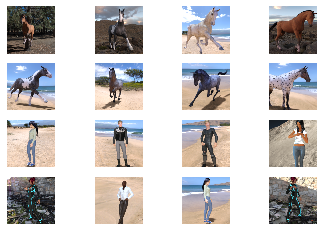

In [9]:
for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Only one output (Binary classification)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy']) 

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator, steps_per_epoch=5, epochs=15, verbose=1)

  ...
    to  
  ['...']
Train for 5 steps
Epoch 1/15
5/5 [==============================] - 3s 699ms/step - loss: 0.9431 - accuracy: 0.5165
Epoch 2/15
5/5 [==============================] - 3s 676ms/step - loss: 0.6733 - accuracy: 0.5609
Epoch 3/15
5/5 [==============================] - 4s 723ms/step - loss: 1.3452 - accuracy: 0.6250
Epoch 4/15
5/5 [==============================] - 4s 717ms/step - loss: 0.6434 - accuracy: 0.6016
Epoch 5/15
5/5 [==============================] - 4s 723ms/step - loss: 0.4823 - accuracy: 0.7406
Epoch 6/15
5/5 [==============================] - 4s 725ms/step - loss: 0.3516 - accuracy: 0.8484
Epoch 7/15
5/5 [==============================] - 4s 715ms/step - loss: 0.3002 - accuracy: 0.8766
Epoch 8/15
5/5 [==============================] - 3s 622ms/step - loss: 0.3437 - accuracy: 0.8563
Epoch 9/15
5/5 [==============================] - 4s 722ms/step - loss: 0.1528 - accuracy: 0.9453
Epoch 10/15
5/5 [==============================] - 3s 624ms/step - loss: 0.

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


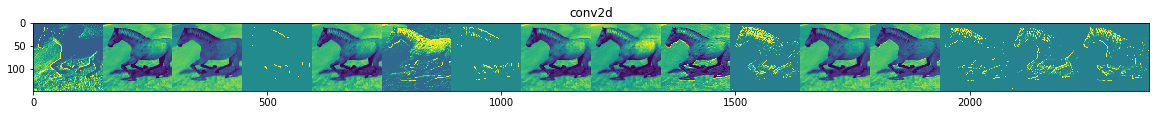

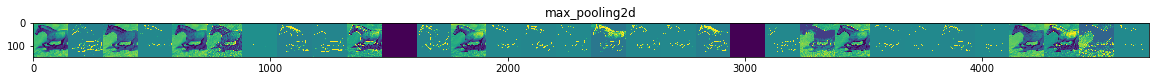

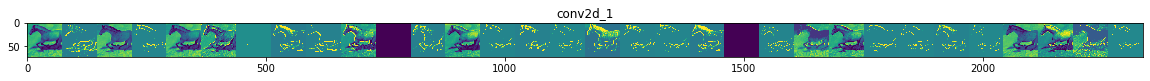

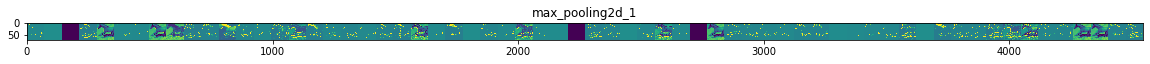

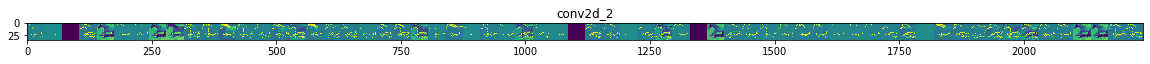

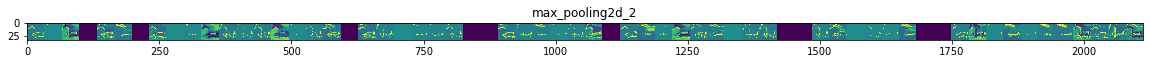

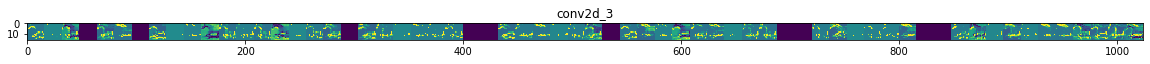

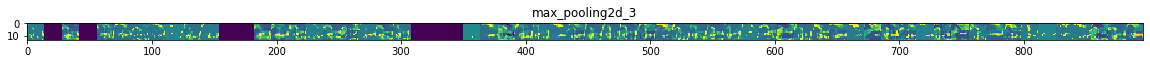

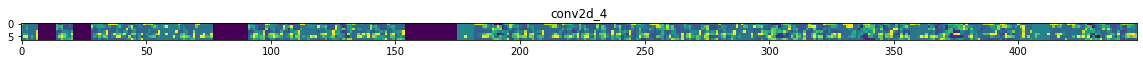

In [17]:
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')